In [10]:
import numpy as np
import matplotlib.pylab as plt

In [246]:
def gaussian(x, amplitude=1.0, center=1074.7, sigma=1.0, expon=2.0):
    ...
    return (amplitude/(np.sqrt(2*np.pi)*sigma))* np.exp(-abs(x-center)**expon / (2*sigma**expon))

def superGaus(x, a, b, alpha):
    y = np.log((np.cosh(2*alpha*np.pi*a)+np.cosh(2*alpha*np.pi*x))/(np.cosh(2*alpha*np.pi*b)+np.cosh(2*alpha*np.pi*x)))
    y = y/np.pi/alpha/6
    return(y)


In [316]:
# Input wavelengths from github and Alins comments

#2021 5 wavelength tuning for UCoMP 1074
old1074 = np.array([1074.48, 1074.59, 1074.70,1074.81, 1074.92])
#Proposed Narrow tuning wavelngth based on adding a tuning position between
#the 2022 3 wavelength Scans
narrow1074 = np.array([1074.58 ,1074.64,1074.70,1074.76,1074.82])
#Absorbtion regions reported by Alin
bad1074 =np.array([1074.46,1074.93,1074.63])
#Clean background regions reported by Alin
clean1074 = [[1074.21,1074.31],[1075.14,1075.26]]
#Likely clean continum location based on Alin's reporting
continumLocation1074 =  np.array([1074.26,1075.19])


#2021 5 wavelength tuning for UCoMP 1079
old1079 =[1079.58,1079.69,1079.80,1079.91,1080.02]
#Proposed Narrow tuning wavelngth based on adding a tuning position between
#the 2022 3 wavelength Scans
narrow1079 = np.array([1079.68,1079.74,1079.80,1079.86,1079.92])

#Absorbtion regions reported by Alin
bad1079 =np.array([1079.61,1079.95])
#Clean background regions reported by Alin
clean1079 = [[1079.33,1079.44],[1080.01,1080.09]]
#Likely clean continum location based on Alin's reporting
continumLocation1079 =  np.array([1079.40,1080.05])



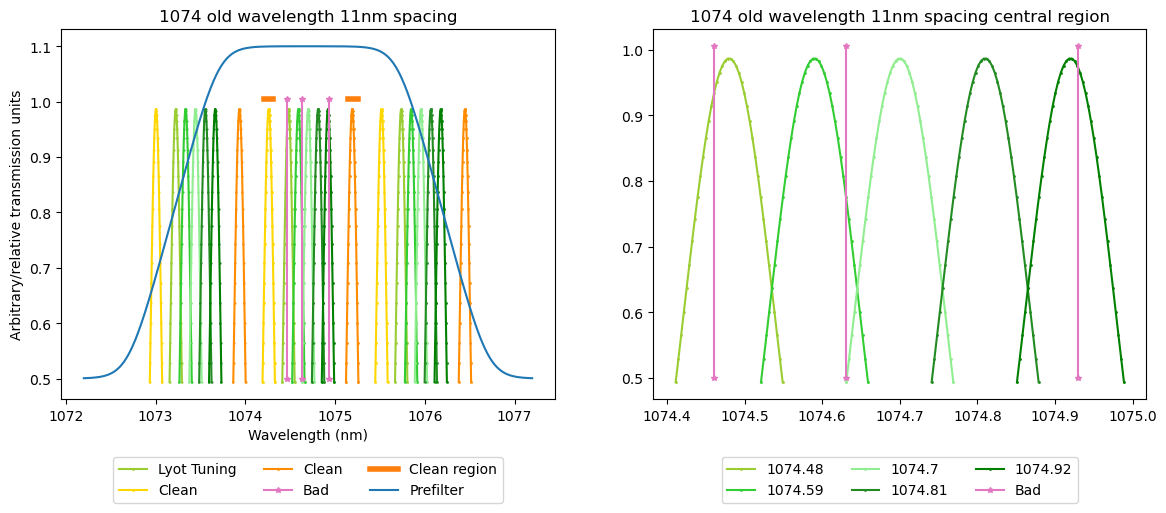

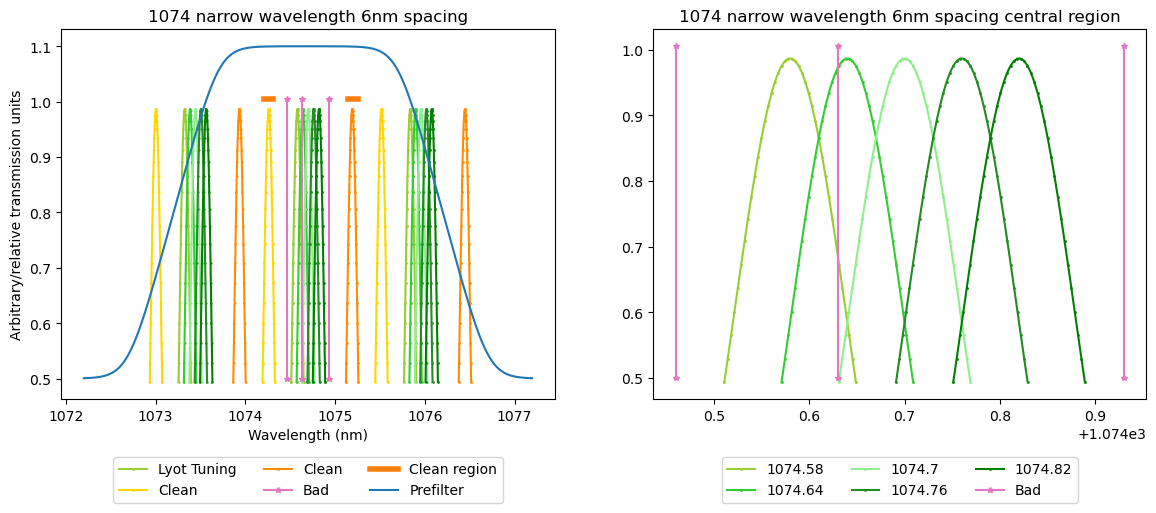

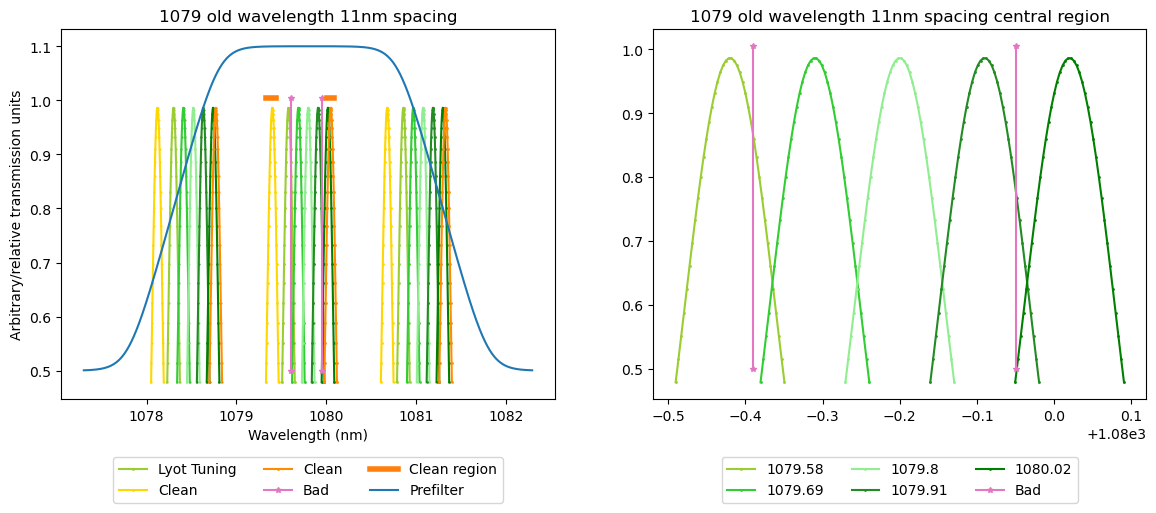

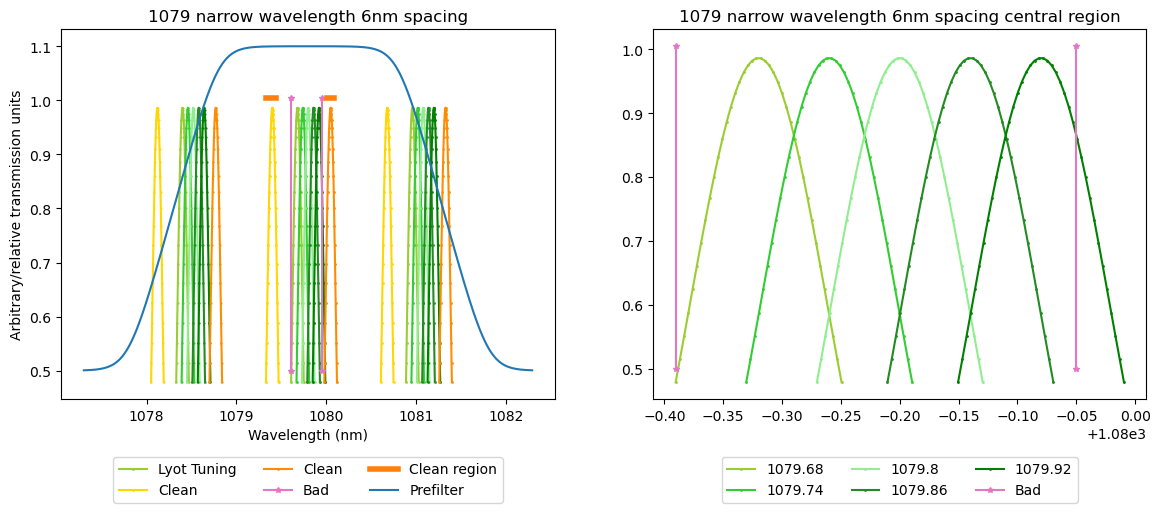

In [325]:
plotTunings(old1074,bad1074,clean1074,.138,1.256,1074.7,continumLocation1074,"1074 old wavelength 11nm spacing")
plotTunings(narrow1074,bad1074,clean1074,.138,1.256,1074.7,continumLocation1074,"1074 narrow wavelength 6nm spacing")

plotTunings(old1079,bad1079,clean1079,.141,1.28,1079.8,continumLocation1079,"1079 old wavelength 11nm spacing")
plotTunings(narrow1079,bad1079,clean1079,.141,1.28,1079.8,continumLocation1079,"1079 narrow wavelength 6nm spacing")

In [324]:
def plotTunings(waveArray,badArray,cleanArray,filterFWHM,continumOffset,centerWave,contArray=None,description=""):
    tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
    contColors=["gold","darkorange","bisque"]
    marker="o"

    numPts = 40
    pts = np.arange(numPts)/(numPts-1)*filterFWHM-filterFWHM/2
    markerSize = 1
    fig,axes = plt.subplots(ncols=2)
    fig.set_figwidth(14)
    #fig1, ax1 = plt.subplots()
    ax = axes[0]
    ax1 = axes[1]
    for i, tun in enumerate(waveArray):
        if i ==0:
            ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label="Lyot Tuning")
            ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
            ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
            ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))

        else:
            ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize)
            ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
            ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
            ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
    if contArray is not None:
        for i, tun in enumerate(contArray):
                ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="o",ms=markerSize,label="Clean")
                ax.plot(tun+pts-continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker=">",ms=markerSize)
                ax.plot(tun+pts+continumOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="<",ms=markerSize)


    badYVal = 1.005


    for i, bad in enumerate(badArray):
        if i ==0:
            ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
            ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
        else:
            ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)
            ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)

    lineWidth = 4

    for i, cleanRegion in enumerate(cleanArray):
        if i ==0:
            ax.plot(cleanRegion,np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth,label="Clean region")
        else:
            ax.plot(cleanRegion,np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)
    ax1.set_title(description +" central region")

    ax.set_title(description)
    ax.set_ylabel("Arbitrary/relative transmission units")
    ax.set_xlabel("Wavelength (nm)")
    
    x = np.arange(1000)/200-2.5
    ax.plot(x+centerWave,superGaus(x,2,1,1.5)*1.8+.5,label="Prefilter")
    ax.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center',ncol=3)
    ax1.legend(bbox_to_anchor =(0.5,-0.3), loc='lower center',ncol=3)
    #ax.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    #ax1.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

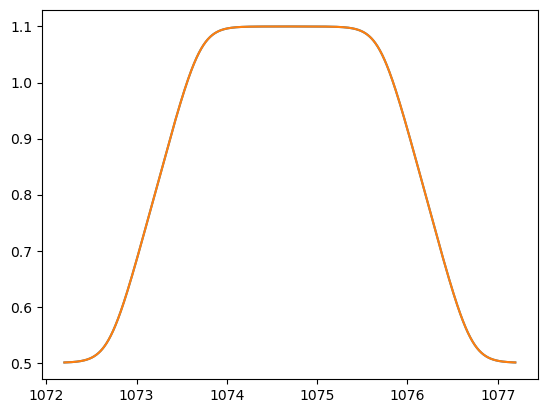

In [274]:
x = np.arange(1000)/200-2.5
plt.plot(x+1074.7,superGaus(x,2,1,1.5)*1.8+.5)
plt.plot(x+1074.7,superGaus(x,2,1,1.5)*1.8+.5)

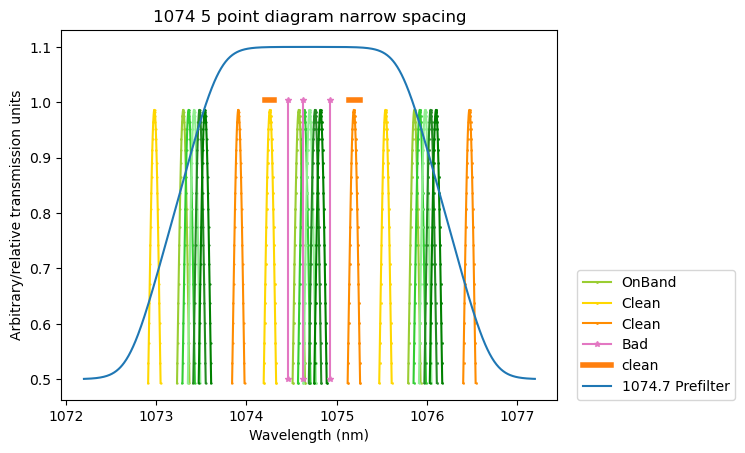

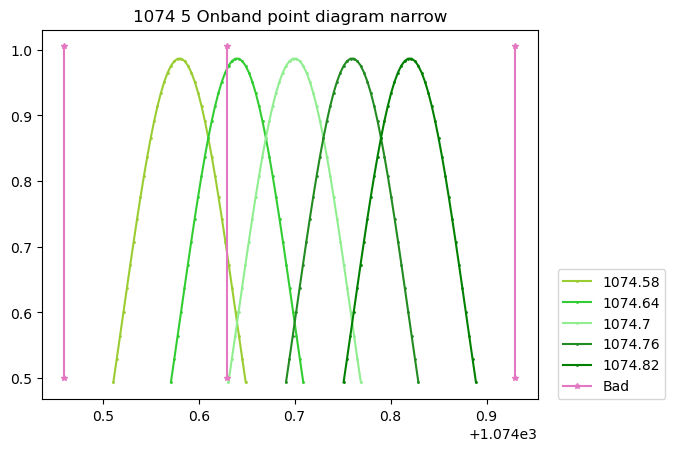

In [247]:
colorsO = ["bo-","mo-","go-","yo-","ko-","co-","ro-"]
colorsR = ["b>-","m>-","g>-","y>-","k>-","c>-","r>-"]
colorsB = ["b<-","m<-","g<-","y<-","k<-","c<-","r<-"]

tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
contColors=["gold","darkorange","bisque"]
marker="o"

numPts = 40
pts = np.arange(numPts)/(numPts-1)*.138-.138/2
contOffset = 1.28
bandpassVals = np.sqrt((np.min([np.arange(numPts)[::-1],np.arange(numPts)],axis=0)+1)/10000)
bandpassVals =bandpassVals+(1-np.max(bandpassVals))
markerSize = 1
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()

for i, tun in enumerate(a1074narrow):
    if i ==0:
        #plt.plot(1074.7+pts,gaussian(1074.7+pts,amplitude=.5))
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label="OnBand")
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
        ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
        
    else:
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize)
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
        ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
       
for i, tun in enumerate(cont1074):
        #plt.plot(1074.7+pts,gaussian(1074.7+pts,amplitude=.5))
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="o",ms=markerSize,label="Clean")
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="<",ms=markerSize)
  
        
badWave = [1074.46,1074.93,1074.63]
badYVal = 1.005
np.array(badWave).astype(np.float64)
np.zeros(len(badWave))+badYVal

for i, bad in enumerate(np.array(badWave).astype(np.float64)):
    if i ==0:
        ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
        ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
    else:
        ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)
        ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)

lineWidth = 4


ax.plot(np.array([1074.21,1074.31]),np.array([badYVal,badYVal]),"tab:orange",label="clean",linewidth=lineWidth)
ax.plot(np.array([1075.14,1075.26]),np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)

#ax1.plot(np.array([1074.21,1074.31]),np.array([badYVal,badYVal]),"tab:orange",label="clean",linewidth=lineWidth)
#ax1.plot(np.array([1075.14,1075.26]),np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)
ax1.set_title("1074 5 Onband point diagram narrow")

ax.set_title("1074 5 point diagram narrow spacing")
ax.set_ylabel("Arbitrary/relative transmission units")
ax.set_xlabel("Wavelength (nm)")
x = np.arange(1000)/200-2.5
#print(x)
ax.plot(x+1074.7,superGaus(x,2,1,1.5)*1.8+.5,label="1074.7 Prefilter")
ax.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
ax1.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

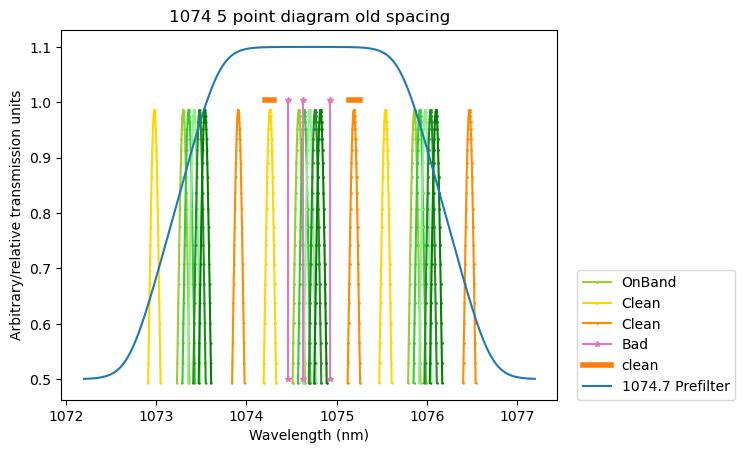

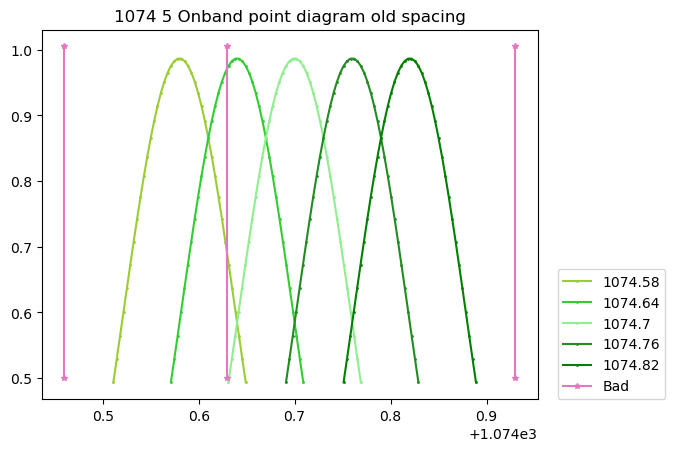

In [249]:
colorsO = ["bo-","mo-","go-","yo-","ko-","co-","ro-"]
colorsR = ["b>-","m>-","g>-","y>-","k>-","c>-","r>-"]
colorsB = ["b<-","m<-","g<-","y<-","k<-","c<-","r<-"]

tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
tuneColors=["yellowgreen","limegreen","lightgreen","forestgreen","green","seagreen","darkgreen"]
contColors=["gold","darkorange","bisque"]
marker="o"

numPts = 40
pts = np.arange(numPts)/(numPts-1)*.138-.138/2
contOffset = 1.28
bandpassVals = np.sqrt((np.min([np.arange(numPts)[::-1],np.arange(numPts)],axis=0)+1)/10000)
bandpassVals =bandpassVals+(1-np.max(bandpassVals))
markerSize = 1
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()

for i, tun in enumerate(a1074):
    if i ==0:
        #plt.plot(1074.7+pts,gaussian(1074.7+pts,amplitude=.5))
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label="OnBand")
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
        ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
        
    else:
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize)
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="<",ms=markerSize)
        ax1.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),tuneColors[i],marker="o",ms=markerSize,label=str(tun))
       
for i, tun in enumerate(cont1074):
        #plt.plot(1074.7+pts,gaussian(1074.7+pts,amplitude=.5))
        ax.plot(tun+pts,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="o",ms=markerSize,label="Clean")
        ax.plot(tun+pts-contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker=">",ms=markerSize)
        ax.plot(tun+pts+contOffset,gaussian(tun+pts,center=tun,amplitude=1/6.9,sigma=.138/2.355),contColors[i],marker="<",ms=markerSize)
  
        
badWave = [1074.46,1074.93,1074.63]
badYVal = 1.005
np.array(badWave).astype(np.float64)
np.zeros(len(badWave))+badYVal

for i, bad in enumerate(np.array(badWave).astype(np.float64)):
    if i ==0:
        ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
        ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",label="Bad",ms=4)
    else:
        ax.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)
        ax1.plot([bad,bad],[.5,badYVal],"tab:pink",linestyle='solid',marker="*",ms=4)

lineWidth = 4


ax.plot(np.array([1074.21,1074.31]),np.array([badYVal,badYVal]),"tab:orange",label="clean",linewidth=lineWidth)
ax.plot(np.array([1075.14,1075.26]),np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)

#ax1.plot(np.array([1074.21,1074.31]),np.array([badYVal,badYVal]),"tab:orange",label="clean",linewidth=lineWidth)
#ax1.plot(np.array([1075.14,1075.26]),np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)
ax1.set_title("1074 5 Onband point diagram old spacing")

ax.set_title("1074 5 point diagram old spacing")
ax.set_ylabel("Arbitrary/relative transmission units")
ax.set_xlabel("Wavelength (nm)")
x = np.arange(1000)/200-2.5
#print(x)
ax.plot(x+1074.7,superGaus(x,2,1,1.5)*1.8+.5,label="1074.7 Prefilter")
ax.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
ax1.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)

IndexError: list index out of range

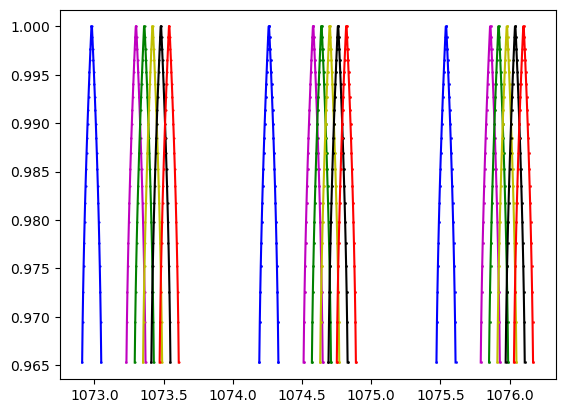

In [192]:
colorsO = ["bo-","mo-","go-","yo-","ko-","ro-"]
colorsR = ["b>-","m>-","g>-","y>-","k>-","r>-"]
colorsB = ["b<-","m<-","g<-","y<-","k<-","r<-"]

numPts = 40
pts = np.arange(numPts)/(numPts-1)*.138-.138/2
contOffset = 1.28
bandpassVals = np.sqrt((np.min([np.arange(numPts)[::-1],np.arange(numPts)],axis=0)+1)/10000)
bandpassVals =bandpassVals+(1-np.max(bandpassVals))
markerSize = 1
for i, tun in enumerate(a1074):
    if i ==0:
        plt.plot(tun+pts,bandpassVals,colorsO[i],ms=markerSize,label="OnBand")
        plt.plot(tun+pts-contOffset,bandpassVals,colorsR[i],ms=markerSize,label="Cont Blue")
        plt.plot(tun+pts+contOffset,bandpassVals,colorsB[i],ms=markerSize,label="Cont Red")
    else:
        plt.plot(tun+pts,bandpassVals,colorsO[i],ms=markerSize)
        plt.plot(tun+pts-contOffset,bandpassVals,colorsR[i],ms=markerSize)
        plt.plot(tun+pts+contOffset,bandpassVals,colorsB[i],ms=markerSize)
    
badWave = [1074.46,1074.93,1074.63]
badYVal = 1.0005
np.array(badWave).astype(np.float64)
np.zeros(len(badWave))+badYVal
plt.plot(np.array(badWave).astype(np.float64),np.zeros(len(badWave))+badYVal,"tab:pink",label="Bad",ms=4)

lineWidth = 4


plt.plot(np.array([1074.21,1074.31]),np.array([badYVal,badYVal]),"tab:orange",label="clean",linewidth=lineWidth)
plt.plot(np.array([1075.14,1075.26]),np.array([badYVal,badYVal]),"tab:orange",linewidth=lineWidth)
plt.title("1074 5 point diagram old pacing")
plt.ylabel("Arbitrary/relative transmission units")
plt.xlabel("Wavelength (nm)")
plt.legend()

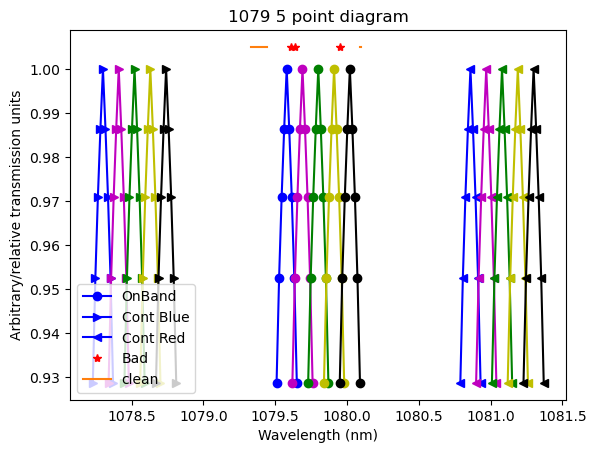

In [141]:
colorsO = ["bo-","mo-","go-","yo-","ko-"]
colorsR = ["b>-","m>-","g>-","y>-","k>-"]
colorsB = ["b<-","m<-","g<-","y<-","k<-"]

pts = np.arange(9)/8*.141-.141/2
contOffset = 1.28
bandpassVals = np.sqrt((np.min([np.arange(9)[::-1],np.arange(9)],axis=0)+1)/300)
bandpassVals =bandpassVals+(1-np.max(bandpassVals))
for i, tun in enumerate(a1079):
    if i ==0:
        plt.plot(tun+pts,bandpassVals,colorsO[i],label="OnBand")
        plt.plot(tun+pts-contOffset,bandpassVals,colorsR[i],label="Cont Blue")
        plt.plot(tun+pts+contOffset,bandpassVals,colorsB[i],label="Cont Red")
    else:
        plt.plot(tun+pts,bandpassVals,colorsO[i])
        plt.plot(tun+pts-contOffset,bandpassVals,colorsR[i])
        plt.plot(tun+pts+contOffset,bandpassVals,colorsB[i])
    
badWave = [1079.61,1079.64,1079.95]
badYVal = 1.005
np.array(badWave).astype(np.float64)
np.zeros(len(badWave))+badYVal
plt.plot(np.array(badWave).astype(np.float64),np.zeros(len(badWave))+badYVal,"r*",label="Bad")




plt.plot(np.array([1079.33,1079.44]),np.array([badYVal,badYVal]),"tab:orange",label="clean")
plt.plot(np.array([1080.1,1080.09]),np.array([badYVal,badYVal]),"tab:orange")
plt.title("1079 5 point diagram")
plt.ylabel("Arbitrary/relative transmission units")
plt.xlabel("Wavelength (nm)")
plt.legend()

array([0.5236068 , 0.61622777, 0.68729833, 0.7472136 , 0.8       ,
       0.8       , 0.7472136 , 0.68729833, 0.61622777, 0.5236068 ])

array([0.2, 0.4, 0.6, 0.8, 1. , 1. , 0.8, 0.6, 0.4, 0.2])